## Assignment 2: Time Series Forecasting

### Dongju Ma A1942340

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### 1. Read the dataset

In [3]:
# Read the original data
df = pd.read_csv('./data/energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### 2. Analyse and visualise the data

In [54]:
# Show data types of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [55]:
# Summary of the data
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [56]:
# Check missing values
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

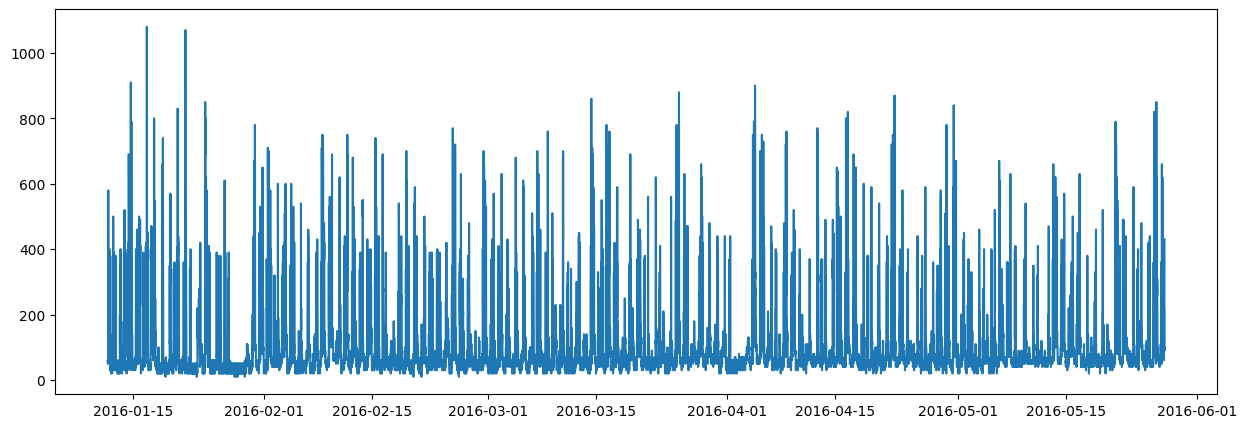

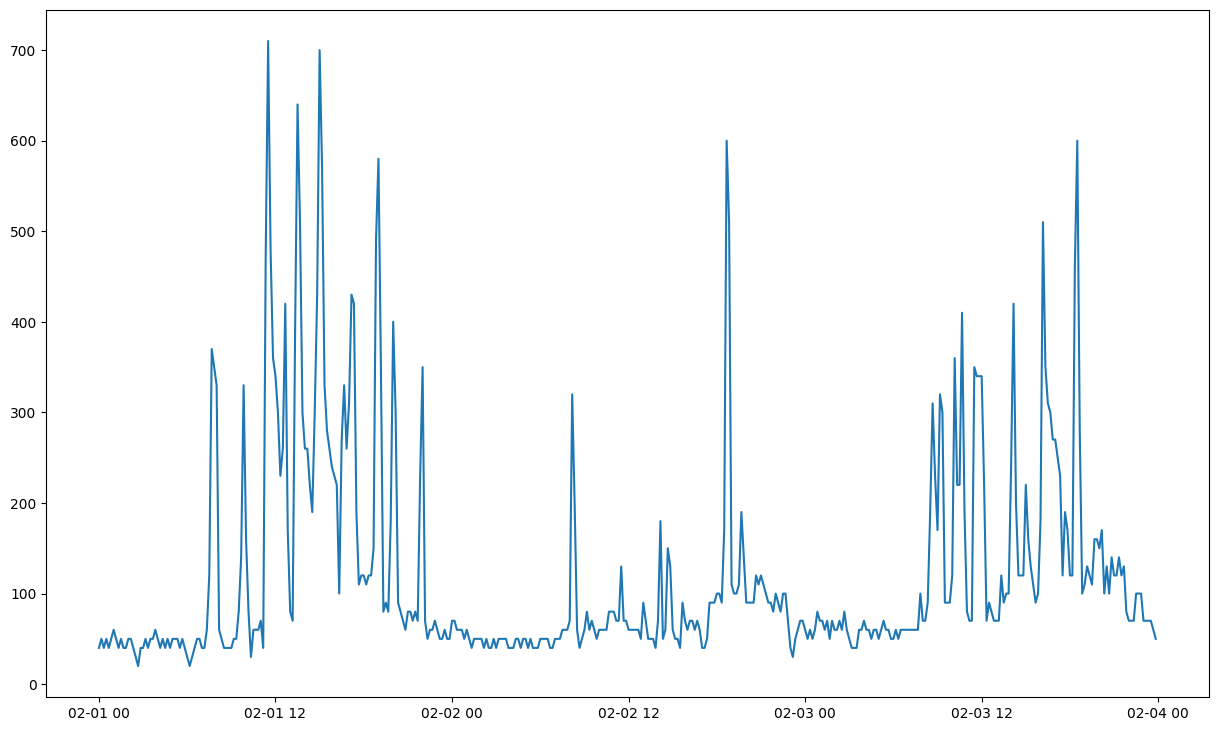

In [4]:
# Extract time index and target to visualize the data
data = df[['date', 'Appliances']].copy()
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Visualize
plt.figure(figsize=(15, 5))
plt.plot(data)
plt.show()

# Visualize the details 
plt.figure(figsize=(15, 15/1.68))
plt.plot(data['2016-02-01':'2016-02-03'])
plt.show()

To reduce arima's time cost and resources usage, we would resample the target variable by taking the hourly mean.

In [180]:
# ADF testing
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print(f'p-value: {result[1]}')

p-value: 0.0


Appliances     1.000000
lights         0.197278
T2             0.120073
T6             0.117638
T_out          0.099155
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
T1             0.055447
T4             0.040281
T8             0.039572
RH_3           0.036292
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015353
T9             0.010010
RH_5           0.006955
Visibility     0.000230
rv1           -0.011145
rv2           -0.011145
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64


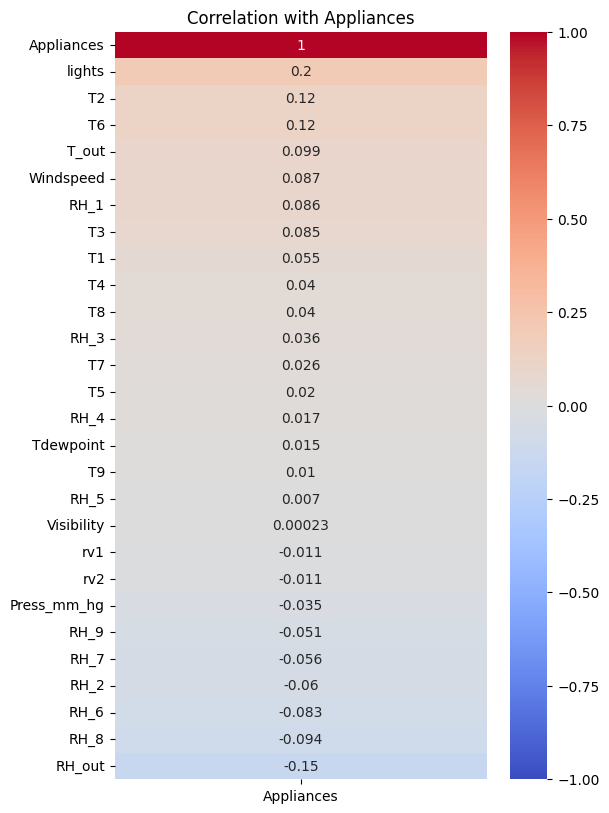

In [98]:
# Correlation with target
df_numeric = df.select_dtypes(include='number')
corr = df_numeric.corr()['Appliances'].sort_values(ascending=False)
print(corr)

# Heatmap
plt.figure(figsize=(6, 6*1.618))
sns.heatmap(df_numeric.corr()[['Appliances']].sort_values(by='Appliances', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation with Appliances")
plt.show()

From the correlation form and heatmap, we could tell that no feature has significant correlation with target.

We could make the following analysis:
* The time index is `date`
* Target Variable is `Appliances`
* There are no missing values
* The target is some kind of seasonal that the appliance electricity went to the peak in afternoon
* As the $p$-value of the target is 0, the target is stationary.
* The target has no significant correlated features

### 3. Implement prediction models

As there is only one single time serie after EDA procedure, we could use ARIMA and LSTM methods to make predictions based on the time index. ARIMA is suitable for single stationary time series while the LSTM model is suitable for the long-term time series. We would also use naive prediction to make a comparison, and find out which method has the best performance. 

In [6]:
# Split data
train_size = int(0.8 * len(data))
train1 = data[:train_size]
test1 = data[train_size:]
print(f'Train1 shape: {train1.shape}')
print(f'Test1 shape: {test1.shape}')

Train1 shape: (15788, 1)
Test1 shape: (3947, 1)


#### Auto Arima
Arima model can make seasonal predictions by setting the parameters, as setting a whole day as a seasonal period would cause a huge resource usage and spend a lot of time, we just set the period to 6, which means an hour's six observations are a unit.

In [ ]:
from pmdarima import auto_arima

# Set model ARIMA
model_arima = auto_arima(
    train1,
    seasonal=True,
    m=6,
    max_p=2, max_q=2, max_d=1,
    max_P=1, max_Q=1, max_D=1,
    trace=True,
    stepwise=True,               
    error_action='ignore',
    suppress_warnings=True
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[6] intercept   : AIC=inf, Time=24.63 sec
 ARIMA(0,0,0)(0,0,0)[6] intercept   : AIC=191820.430, Time=0.10 sec
 ARIMA(1,0,0)(1,0,0)[6] intercept   : AIC=178368.170, Time=5.86 sec
 ARIMA(0,0,1)(0,0,1)[6] intercept   : AIC=181731.234, Time=6.23 sec
 ARIMA(0,0,0)(0,0,0)[6]             : AIC=201686.541, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[6] intercept   : AIC=178394.945, Time=0.21 sec
 ARIMA(1,0,0)(1,0,1)[6] intercept   : AIC=178339.041, Time=13.93 sec
 ARIMA(1,0,0)(0,0,1)[6] intercept   : AIC=178370.742, Time=7.89 sec
 ARIMA(0,0,0)(1,0,1)[6] intercept   : AIC=189431.474, Time=10.43 sec
 ARIMA(2,0,0)(1,0,1)[6] intercept   : AIC=178204.711, Time=16.20 sec
 ARIMA(2,0,0)(0,0,1)[6] intercept   : AIC=178255.439, Time=4.67 sec
 ARIMA(2,0,0)(1,0,0)[6] intercept   : AIC=178249.928, Time=4.34 sec
 ARIMA(2,0,0)(0,0,0)[6] intercept   : AIC=178302.943, Time=0.55 sec
 ARIMA(2,0,1)(1,0,1)[6] intercept   : AIC=178088.631, Time=19.25 sec
 ARIMA(

In [128]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                15788
Model:             SARIMAX(1, 0, 2)x(1, 0, [1], 6)   Log Likelihood              -88987.644
Date:                             Sat, 10 May 2025   AIC                         177989.288
Time:                                     15:36:43   BIC                         178042.957
Sample:                                 01-11-2016   HQIC                        178007.050
                                      - 04-30-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.4711      2.684      7.626      0.000      15.210      25.732
ar.L1          0.8710      0.005    166.942      0.000       0.861       0.881
ma.L1         -0.0856      0.007    -12.931      0.000      -0.099      -0.073
ma.L2         -0.2451      0.006    -40.395      0.000      -0.257      -0.233
ar.S.L6       -0.6224      0.159     -3.917      0.000      -0.934      -0.311
ma.S.L6        0.6014      0.162      3.708      0.000       0.284       0.919
sigma2      4613.8035     22.015    209.572      0.000    4570.654    4656.953
===================================================================================
Ljung-Box (L1) (Q):                   8.12   Jarque-Bera (JB):            374353.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             3.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Then we have the ARIMA model.

#### LSTM
LSTM method is a special RNN, which decides the output based on hidden states and cell states. It would learn the pattern from the training set and learn how to predict automatically. 

In [7]:
# Define LSTM class and its input sequences
import torch
from sklearn.preprocessing import MinMaxScaler
import torch.nn as nn

series = data['Appliances'].values.reshape(-1,1)

# Data scaling
scaler = MinMaxScaler()
series_scaled = scaler.fit_transform(series)

def create_sequences(data, seq_len):
    xs, ys = [], []
    for i in range(len(data) - seq_len):
        x = data[i:i+seq_len]
        y = data[i+seq_len][0]
        xs.append(x)
        ys.append(y)
    return (
        torch.tensor(np.array(xs), dtype=torch.float32),
        torch.tensor(np.array(ys), dtype=torch.float32).unsqueeze(1)
    )

seq_len = 6
X, y = create_sequences(series_scaled, seq_len)

# Data split
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :]) 
        return out

# Set model LSTM
model_lstm = LSTMModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_lstm.parameters(), lr=0.001)

### 4. Train prediction models

#### Auto Arima

In [129]:
model_arima.fit(train1)

ARIMA(order=(1, 0, 2), scoring_args={}, seasonal_order=(1, 0, 1, 6),
      suppress_warnings=True)

#### LSTM

In [8]:
for epoch in range(300):
    model_lstm.train()
    output = model_lstm(X_train)  
    loss = criterion(output, y_train)  
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 300, Loss: 0.0040


### 5. Test predictin models and show results

In [ ]:
# ARIMA's prediction
forecast_arima = model_arima.predict(n_periods=train_size)  
forecast_arima = pd.Series(forecast_arima, index=test1.index)
forecast_arima

date
2016-04-30 08:20:00    251.895099
2016-04-30 08:30:00    177.800145
2016-04-30 08:40:00    167.485141
2016-04-30 08:50:00    159.434024
2016-04-30 09:00:00    151.050255
                          ...    
2016-05-27 17:20:00     97.801560
2016-05-27 17:30:00     97.801560
2016-05-27 17:40:00     97.801560
2016-05-27 17:50:00     97.801560
2016-05-27 18:00:00     97.801560
Length: 3947, dtype: float64

In [ ]:
# LSTM's prediction
model_lstm.eval()
with torch.no_grad():
    pred = model_lstm(X_test).squeeze().numpy()

y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
pred_inv = scaler.inverse_transform(pred.reshape(-1, 1)).flatten()

full_index = data.index[seq_len:]  
train_len = len(y_train)
test_index = full_index[train_len : train_len + len(y_test_inv)]

forecast_lstm = pd.Series(pred_inv, index=test_index)
forecast_lstm

date
2016-04-30 08:30:00    280.367493
2016-04-30 08:40:00    460.951538
2016-04-30 08:50:00    234.987518
2016-04-30 09:00:00    291.612305
2016-04-30 09:10:00    236.235229
                          ...    
2016-05-27 17:20:00     98.619377
2016-05-27 17:30:00    106.654388
2016-05-27 17:40:00     94.040947
2016-05-27 17:50:00    233.150940
2016-05-27 18:00:00    326.078735
Length: 3946, dtype: float32

In [ ]:
# A function to select the best naive prediction
def select_best_naive(data: pd.Series, 
                      seasonals: list, 
                      test: pd.DataFrame=test1, 
                      train_size: int=train_size,
                      ) -> pd.Series:
    rmse = {}
    for seasonal in seasonals:
        forecast = data.shift(seasonal)[train_size:]
        rmse[seasonal] = mean_squared_error(test.values, forecast.values) ** 0.5
   
    best_seasonal, best_rmse = min(rmse.items(), key=lambda x: x[1])
    print(f"Best seasonal lag: {best_seasonal}, RMSE: {best_rmse:.4f}")
    return data.shift(best_seasonal)[train_size:]

In [ ]:
# Best naive prediction
seasonals = [1, 6, 12, 24, 36, 48, 72, 144]
forecast_naive = select_best_naive(data['Appliances'], seasonals)
forecast_naive

Best seasonal lag: 1, RMSE: 66.4376


date
2016-04-30 08:20:00    300.0
2016-04-30 08:30:00    370.0
2016-04-30 08:40:00    590.0
2016-04-30 08:50:00    320.0
2016-04-30 09:00:00    310.0
                       ...  
2016-05-27 17:20:00     90.0
2016-05-27 17:30:00    100.0
2016-05-27 17:40:00     90.0
2016-05-27 17:50:00    270.0
2016-05-27 18:00:00    420.0
Name: Appliances, Length: 3947, dtype: float64

### 6. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

Compare the results from all candidate models, choose the best model, justify your choice and discuss the results.

#### Arima

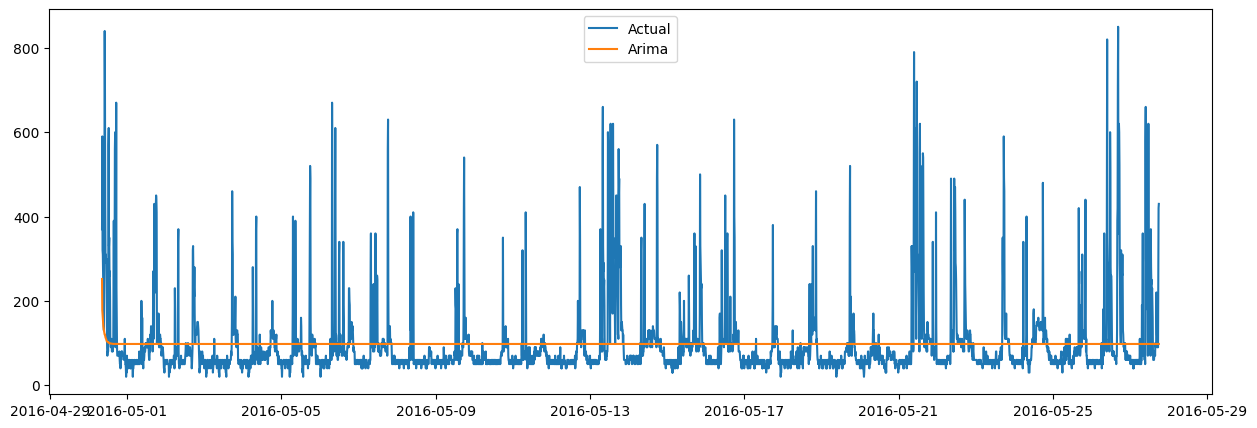

MSE (ARIMA): 8204.5647
RMSE (ARIMA): 90.5791
MAE (ARIMA): 52.4015
MAPE (ARIMA): 0.5963


In [154]:
plt.figure(figsize=(15, 5))
plt.plot(test1, label='Actual')
plt.plot(forecast_arima, label='Arima')
plt.legend()
plt.show()

mse_arima = mean_squared_error(test1.values, forecast_arima.values)
rmse_arima = mse_arima ** 0.5
mae_arima = mean_absolute_error(test1.values, forecast_arima.values)
mape_arima = mean_absolute_percentage_error(test1.values, forecast_arima.values)

print(f"MSE (ARIMA): {mse_arima:.4f}")
print(f"RMSE (ARIMA): {rmse_arima:.4f}")
print(f"MAE (ARIMA): {mae_arima:.4f}")
print(f"MAPE (ARIMA): {mape_arima:.4f}")

#### LSTM

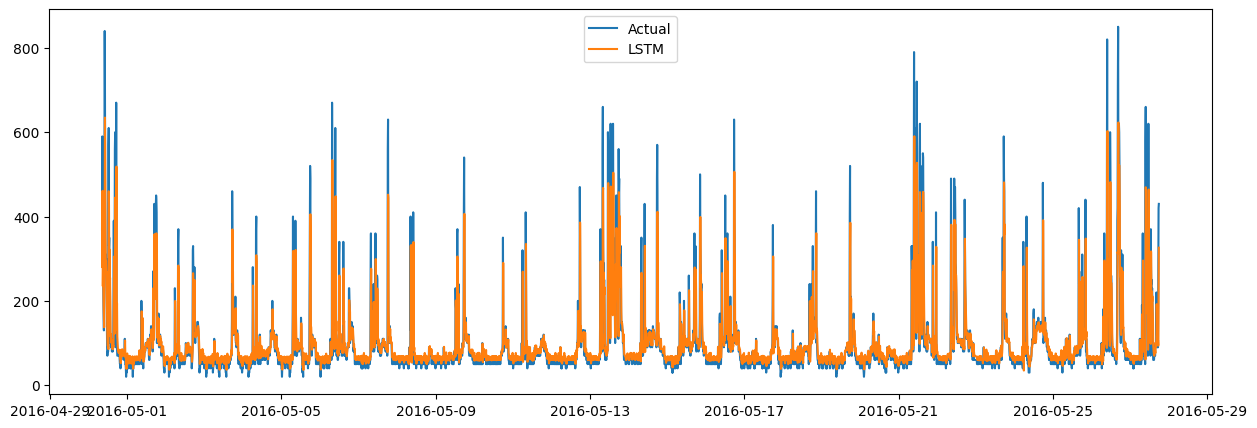

MSE (LSTM): 3652.0377
RMSE (LSTM): 60.4321
MAE (LSTM): 26.4772
MAPE (LSTM): 0.2484


In [155]:
plt.figure(figsize=(15, 5))
plt.plot(test1, label='Actual')
plt.plot(test_index, pred_inv, label='LSTM')  
plt.legend()
plt.show()

mse_lstm = mean_squared_error(y_test_inv, pred_inv)
rmse_lstm = mse_lstm ** 0.5
mae_lstm = mean_absolute_error(y_test_inv, pred_inv)
mape_lstm = mean_absolute_percentage_error(y_test_inv, pred_inv)

print(f"MSE (LSTM): {mse_lstm:.4f}")
print(f"RMSE (LSTM): {rmse_lstm:.4f}")
print(f"MAE (LSTM): {mae_lstm:.4f}")
print(f"MAPE (LSTM): {mape_lstm:.4f}")

#### Naive

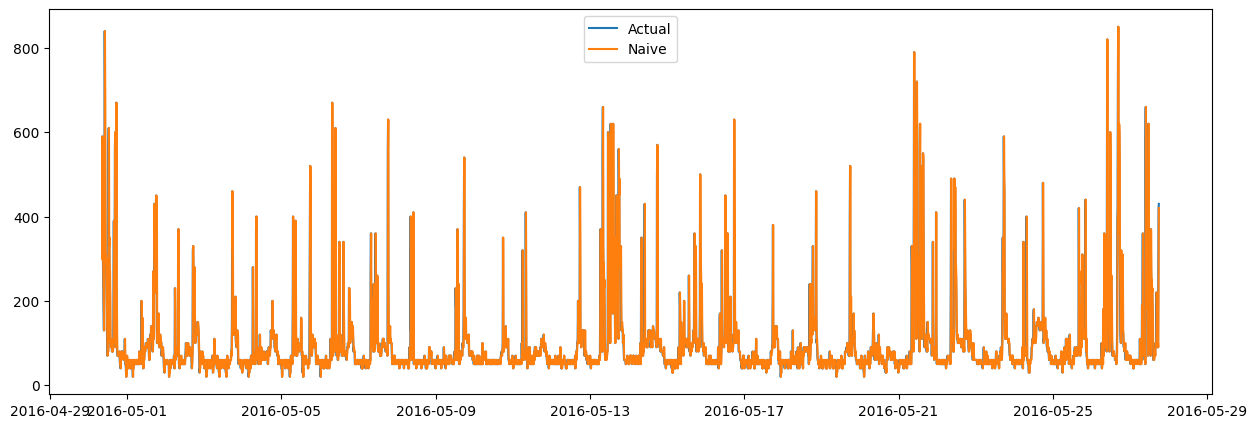

MSE (Naive): 4413.9600
RMSE (Naive): 66.4376
MAE (Naive): 26.6506
MAPE (Naive): 0.2194


In [164]:
plt.figure(figsize=(15, 5))
plt.plot(test1, label='Actual')
plt.plot(forecast_naive, label='Naive')
plt.legend()
plt.show()

mse_naive = mean_squared_error(test1.values, forecast_naive.values)
rmse_naive = mse_naive ** 0.5
mae_naive = mean_absolute_error(test1.values, forecast_naive.values)
mape_naive = mean_absolute_percentage_error(test1.values, forecast_naive.values)

print(f"MSE (Naive): {mse_naive:.4f}")
print(f"RMSE (Naive): {rmse_naive:.4f}")
print(f"MAE (Naive): {mae_naive:.4f}")
print(f"MAPE (Naive): {mape_naive:.4f}")

Based on the results, I would choose the LSTM model cause it has the lowest MSE, RMSE and MAE.  
Although naive prediction has the lowest MAPE, but RMSE matters more. Further more, based on the test-forecast plotting, we could see the LSTM has the best performance than naive. The naive predictions are covering the actual values but it does't show a better prediction accuracy. 

Then we would focus on each model.
* **ARIMA**  
Arima couldn't perform well and it has the longest time cost. Besides, it needs the target to be stationary otherwise it couldn't be used. So technically although it's algorithm is very mature and understandable, but it has sevral limits and couldn't provide a better performance compared to the other 2 methods in both training and testing.

* **LSTM**  
It's not easy to figure out how LSTM exactly works, but it shows the best performance and could be used in different situations. It doesn't have limit on data station or data scale. Another point is, although it's not used in this assignment, it can use multiple features to predict time series. The challenge in using LSTM is that its coding is more complicated than the other 2 models, and it's very strict in its input sequences, especially the data dimensions.

* **Naive**  
The easiest one in understanding, and the simplest, but not the worst in this assignment. Even though its performance could beat the LSTM in MAPE, which is determined by the feature of target. Using the former data as the prediction of next time period always have a surprised perforamance, but only in some seasonal data. If some feature affected the target, the naive method wouldn't work well. It's commonly used as a baseline in time series forecast.

### 7. Reflect on what you have learned by completing this assignment

After this assignment, I've learned several ways to make time series forecast. This methods actually could be used in my daily life, as an international student who need to be sensitive with exchange rate values. Maybe the advanced forecast could help people to make money in financial investment fields.

### 8. References